✅ Graphviz is available.
Dataset loaded successfully!
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Decision Tree Accuracy: 0.8
Confusion Matrix:
 [[71 31]
 [10 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg      

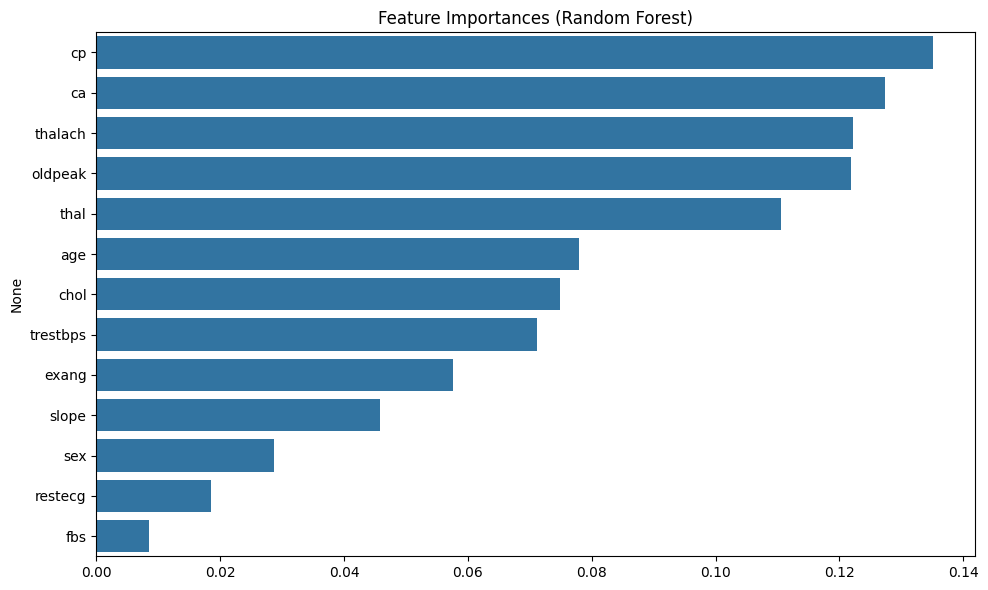


Decision Tree CV Accuracy: 83.41% (+/- 2.39%)
Random Forest CV Accuracy: 99.71% (+/- 0.59%)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ✅ Optional: Check if Graphviz is installed and accessible
def is_graphviz_installed():
    try:
        result = subprocess.run(["dot", "-V"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        return "graphviz" in result.stderr.lower()
    except Exception:
        return False

try:
    import graphviz
    GRAPHVIZ_IMPORTED = True
except ImportError:
    GRAPHVIZ_IMPORTED = False

GRAPHVIZ_AVAILABLE = GRAPHVIZ_IMPORTED and is_graphviz_installed()

if not GRAPHVIZ_AVAILABLE:
    print("⚠ Graphviz not fully available. To enable visualization:")
    print("1. Install Graphviz from https://graphviz.org/download/")
    print("2. Add Graphviz 'bin' folder (e.g., C:\\Program Files\\Graphviz\\bin) to your PATH environment variable.")
else:
    print("✅ Graphviz is available.")

# ✅ Load dataset
df = pd.read_csv('heart.csv')  # Make sure heart.csv is in the same directory
print("Dataset loaded successfully!")
print(df.head())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train_scaled, y_train)

# Evaluate Decision Tree
y_pred_dt = dtree.predict(X_test_scaled)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# 2. Visualize Decision Tree (if available)
if GRAPHVIZ_AVAILABLE:
    dot_data = export_graphviz(dtree, out_file=None,
                               feature_names=X.columns,
                               class_names=['No Disease', 'Disease'],
                               filled=True, rounded=True,
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree_heart")  # Saves as PDF
    print("\n✅ Decision tree visualization saved as 'decision_tree_heart.pdf'")
else:
    print("❌ Skipping decision tree visualization due to missing Graphviz.")

# 3. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 4. Feature Importance Plot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# 5. Cross-Validation Scores
cv_scores_dt = cross_val_score(dtree, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("\nDecision Tree CV Accuracy: %.2f%% (+/- %.2f%%)" % (cv_scores_dt.mean()*100, cv_scores_dt.std()*100))
print("Random Forest CV Accuracy: %.2f%% (+/- %.2f%%)" % (cv_scores_rf.mean()*100, cv_scores_rf.std()*100))
